# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number 

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


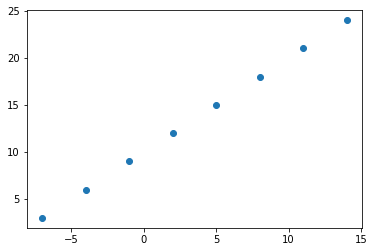

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

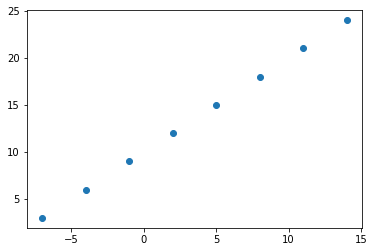

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in creating a model with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 788ms/step - loss: 13.0725 - mae: 13.0725
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 12.9400 - mae: 12.9400
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 12.8075 - mae: 12.8075
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 12.6750 - mae: 12.6750
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 12.5425 - mae: 12.5425


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make prediction using our model
pred = model.predict([17.0])
pred

1/1 [==============================] - 0s 89ms/step


array([[5.1012044]], dtype=float32)

In [ ]:
pred + 11

array([[16.101204]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation fucntion of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting the model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 369ms/step - loss: 11.9537 - mae: 11.9537
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8212 - mae: 11.8212
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6887 - mae: 11.6887
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5562 - mae: 11.5562
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4237 - mae: 11.4237
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2912 - mae: 11.2912
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1587 - mae: 11.1587
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0262 - mae: 11.0262
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8937 - mae: 10.8937
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7612 - mae: 10.7612
Epoch 11/100
1/1 [==============================]

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


array([[29.770662]], dtype=float32)

In [ ]:
# Changing the optimizers of the original model
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 409ms/step - loss: 9.0086 - mae: 9.0086
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0041 - mae: 9.0041
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9996 - mae: 8.9996
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9951 - mae: 8.9951
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9906 - mae: 8.9906
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9861 - mae: 8.9861
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9816 - mae: 8.9816
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9771 - mae: 8.9771
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9726 - mae: 8.9726
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9681 - mae: 8.9681
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 8.

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[23.615639]], dtype=float32)

In [ ]:
# Adding an extra layer to the original model with 100 hidden units
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 455ms/step - loss: 12.4330 - mae: 12.4330
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9899 - mae: 11.9899
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5354 - mae: 11.5354
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0792 - mae: 11.0792
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6038 - mae: 10.6038
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1051 - mae: 10.1051
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.5781 - mae: 9.5781
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0194 - mae: 9.0194
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4253 - mae: 8.4253
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.8594 - mae: 7.8594
Epoch 11/100
1/1 [==============================] - 0s 8ms/ste

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 415ms/step


array([[32.08952]], dtype=float32)

In [ ]:
# Changing the activation functions
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.2612 - mae: 13.2612
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7666 - mae: 12.7666
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 12.2695 - mae: 12.2695
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 11.7672 - mae: 11.7672
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 11.2572 - mae: 11.2572
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7369 - mae: 10.7369
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2035 - mae: 10.2035
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 9.6544 - mae: 9.6544
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0867 - mae: 9.0867
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.4976 - mae: 8.4976
Epoch 11/100
1/1 [==============================] - 0s 18

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 309ms/step


array([[30.035942]], dtype=float32)

In [ ]:
# Changing the optimization function
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.2911 - mae: 14.2911
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 14.2265 - mae: 14.2265
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1617 - mae: 14.1617
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 14.0969 - mae: 14.0969
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0321 - mae: 14.0321
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 13.9672 - mae: 13.9672
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.9022 - mae: 13.9022
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 13.8371 - mae: 13.8371
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 13.7719 - mae: 13.7719
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 13.7066 - mae: 13.7066
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 134ms/step


array([[29.48586]], dtype=float32)

In [ ]:
# Changing the learning rate 
# Learning rate is one of the best way to improve your model
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.01),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.4332 - mae: 12.4332
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 12.3661 - mae: 12.3661
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 12.2989 - mae: 12.2989
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.2317 - mae: 12.2317
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1645 - mae: 12.1645
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 12.0972 - mae: 12.0972
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 12.0299 - mae: 12.0299
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9625 - mae: 11.9625
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 11.8951 - mae: 11.8951
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 11.8276 - mae: 11.8276
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 374ms/step


array([[31.541964]], dtype=float32)

## Evaluating a model

In practise, a typical workflow you'll go through when building neural networks is:

```
Build a model  -> evaluate it -> tweak a model -> fit it -> evaluate it...
```


When it comes to evaluation... there are 3 words you should memorize:
> Visualize, Visualize, Visualize

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - How does a model perform when it learns?
* the presictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

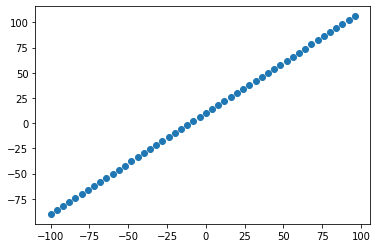

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y);

### The 3 sets:

* **Training set** - The model learns from this data, which is typically 70-80% of the total data available.
* **Validation set** - The model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - The model gets avaluated on this data to test what it has learned, typically 10-15% of the data available.

In [ ]:
# Check the length of how many samples do we have
len(X)

50

Since we don't have much data, we are skippping the validation data set

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data


Now we've got our data in training and test sets... let's visualize it again!

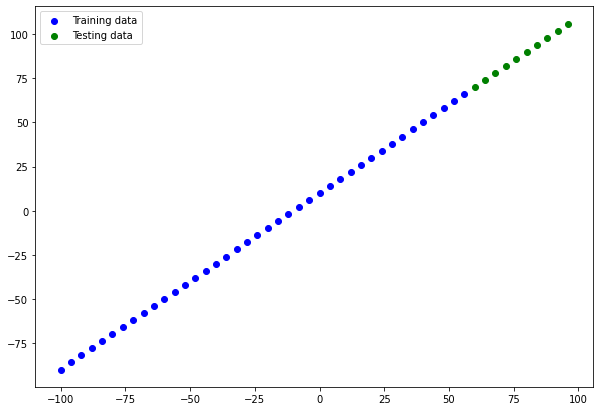

In [ ]:
plt.figure(figsize = (10, 7))

# Plot the training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")

# Plot the test data in green
plt.scatter(X_test, y_test, c = "g", label= "Testing data")

# Show a legend
plt.legend();

In [ ]:
tf.expand_dims(X_train, axis=-1).shape, X_train.shape

(TensorShape([40, 1]), TensorShape([40]))

In [ ]:
# Let's have a loook at how to build a neural network for our data

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 because we are using one variable to predict 
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

In [ ]:
# Let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name= "input_layer"), # X[0], y[0] are just some single numbers hence 1 as the input shape. One can also check using X[0].shape
    tf.keras.layers.Dense(1, name= "output_layer")
    ], name = "model_1")

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics =  ["mae"])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - Total number of parameters in the model 
* Trainable parameters - These are the parameters (patterns) the model can update as it train
* Non-trainable params - These parameters aren't updated during training (this is typical when you bring in an already learn patterns or parameters from other models during **transfer learning**)


**Resources:** For a more in depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video
**Exercise:** Try playing with the number of hidden units in the dense layer, see how that affects the number of parameters (total and trainable) by calling `model.summary()`

In [ ]:
# Let us fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 1s 25ms/step - loss: 46.8821 - mae: 46.8821
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 28.2911 - mae: 28.2911
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 16.3290 - mae: 16.3290
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.2119 - mae: 14.2119
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 15.7601 - mae: 15.7601
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 12.4833 - mae: 12.4833
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 11.7366 - mae: 11.7366
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0866 - mae: 12.0866
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 37.9168 - mae: 37.9168
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 25.5181 - mae: 25.5181
Epoch 11/100
2/2 [==============================] -

In [ ]:
# Let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_trial = tf.keras.Sequential([
    tf.keras.layers.Dense(7, input_shape = [1]) # X[0], y[0] are just some single numbers hence 1 as the input shape. One can also check using X[0].shape
])

# 2. Compile the model (same as above)
model_trial.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics =  ["mae"])

model_trial.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Get a summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


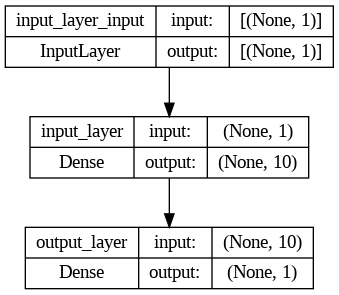

In [ ]:
# Another way of visualizing our machine learning model
from tensorflow.keras.utils import plot_model

plot_model(model= model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against ground truth labels. 

Often you'll see this is the form of `y_test` versus `y_preds` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 108ms/step


array([[ 78.29776],
       [ 83.39866],
       [ 88.49956],
       [ 93.60046],
       [ 98.70136],
       [103.80225],
       [108.90315],
       [114.00405],
       [119.10496],
       [124.20585]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training Data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing Data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend();

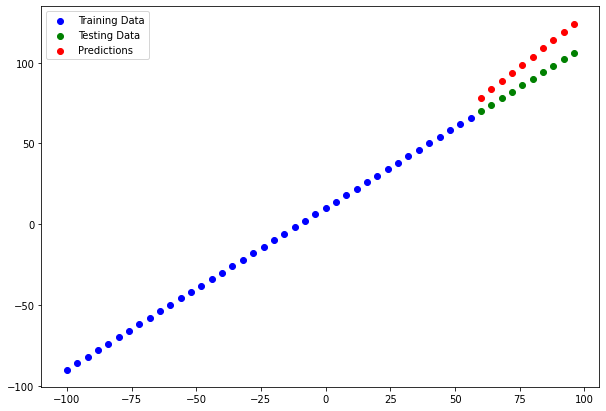

In [ ]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to avaluate your model's performance.

Since we're working on a regression, two of the main metrics are:

* MAE: Mean Absolute Error, "on average, how wrong is each of my model's predictions"

* MSE: Mean Squared Error, "square the average errors"


In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 295ms/step - loss: 13.2518 - mae: 13.2518


[13.251803398132324, 13.251803398132324]

In [ ]:
# Calculate the mean absolute error
tf.keras.losses.mean_absolute_error(y_true = y_test, y_pred =tf.constant(y_preds))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.280896, 10.520268, 10.      , 10.720091, 12.820818, 16.241802,
       20.903152, 26.004053, 31.104956, 36.20585 ], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.29776],
       [ 83.39866],
       [ 88.49956],
       [ 93.60046],
       [ 98.70136],
       [103.80225],
       [108.90315],
       [114.00405],
       [119.10496],
       [124.20585]], dtype=float32)>

We are getting the matrix output due to the difference in the shapes of the two tensors

In [ ]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.29776,  83.39866,  88.49956,  93.60046,  98.70136, 103.80225,
       108.90315, 114.00405, 119.10496, 124.20585], dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_true = y_test, y_pred =tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.251806>

In [ ]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=185.60918>

In [ ]:
# Make some functions to reuse MAE and MSE 
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true  =y_true,
                                      y_pred = tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                     y_pred = tf.squeeze(y_pred))

## Running experiments to improve our model
Build a model -> fit it -> evaluate it -> tweak it -> back to fit... and so on


1. Get more data - get more examples for your model to train (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex method) - this might come in the form of more layers or hidden units in each layer

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.

2. `model_2` - 2 layers, trained for 100 epochs

3. `model_3` - 2 layers, trained for 500 epochs

**Build model_!**tf.metrics.mean_squared_errortf.metrics.mean_squared_errormetricsmmmverrevrfrdwcmmmmwdvbwhebkkkkkk

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 28ms/step - loss: 58.1266 - mae: 58.1266
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 23.6145 - mae: 23.6145
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4135 - mae: 10.4135
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 12.8646 - mae: 12.8646
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 11.9066 - mae: 11.9066
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 11.0341 - mae: 11.0341
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 8.4442 - mae: 8.4442
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 8.8733 - mae: 8.8733
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 17.0168 - mae: 17.0168
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 12.5314 - mae: 12.5314
Epoch 11/100
2/2 [==============================] - 0s

1/1 [==============================] - 0s 76ms/step


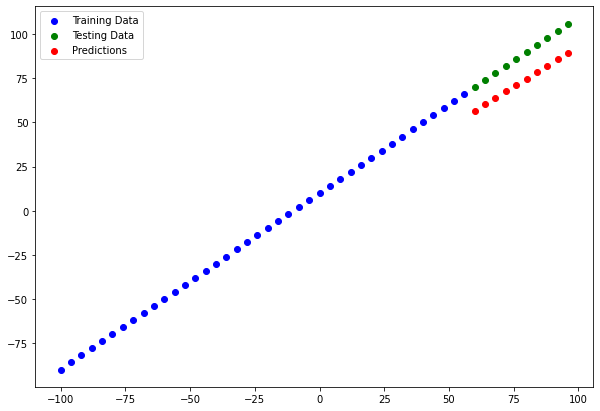

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.964757>,
 <tf.Tensor: shape=(), dtype=float32, numpy=224.79053>)

** Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# 4. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 27.4169 - mse: 1247.8760
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 25.3289 - mse: 869.1691
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 29.2826 - mse: 1296.8933
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 16.4292 - mse: 380.3799
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 18.9667 - mse: 516.5408
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 14.1260 - mse: 281.2923
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 11.4491 - mse: 159.4910
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 11.2221 - mse: 173.5045
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 41.8332 - mse: 2788.2356
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 29.0524 - mse: 1193.1322
Epoch 11/100
2/2 [=================

1/1 [==============================] - 0s 102ms/step


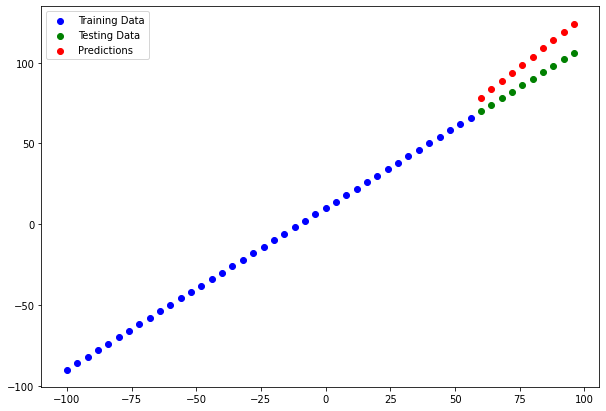

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.202146>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.28748>)

** Build `model_3`**

2 layers, 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3  = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit the model_3
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 10ms/step - loss: 54.9859 - mae: 54.9859
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 29.0851 - mae: 29.0851
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 32.5785 - mae: 32.5785
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 17.5820 - mae: 17.5820
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 19.6864 - mae: 19.6864
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 14.7585 - mae: 14.7585
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 10.4350 - mae: 10.4350
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 12.1204 - mae: 12.1204
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 38.0169 - mae: 38.0169
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.6031 - mae: 25.6031
Epoch 11/500
2/2 [==============================] - 0s

1/1 [==============================] - 0s 65ms/step


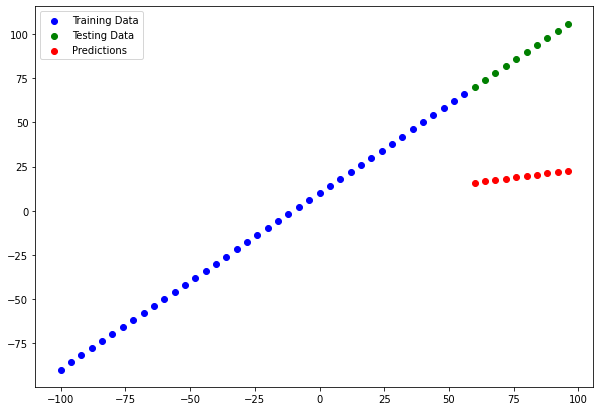

In [ ]:
# Predict and plot the predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [ ]:
# Metrics for model_3
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.700424>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4806.219>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare model's result using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
              
all_results = pd.DataFrame(model_results, columns = ["Model", "mae", "mse"])
all_results

,Model,mae,mse
0,model_1,14.964757,224.790527
1,model_2,13.202146,184.287476
2,model_3,68.700424,4806.219238


Looks like `model_2` performed the best 

In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experim ent you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment."

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard: a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights and biases: a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our model

Saving our model allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our models to:
1. The SavedModel format
2. The HDF5 format 

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

We can make sure that the model we saved above was saved perfectly if we can load that model back.

In [ ]:
# Load in the SavedModel format model_1
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictios
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 85ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_predictions = loaded_h5_model.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 83ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_h5_model_predictions)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download"
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and connecting it there (see second code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_Course 

In [ ]:
!ls /content/drive/MyDrive/TensorFlow_Course

best_model_HDF5_format.h5


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
# Read the insurance dataset 
# Github -> Go to the dataset -> Click on "Raw" -> Copy the link 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one hot encode our dataset so everything get's converted into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8670.4580 - mae: 8670.4580
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7874.0469 - mae: 7874.0469
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7608.3691 - mae: 7608.3691
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0381 - mae: 7792.0381
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7692.1118 - mae: 7692.1118
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7607.4956 - mae: 7607.4956
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7568.8550 - mae: 7568.8550
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7762.8291 - mae: 7762.8291
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7489.6558 - mae: 7489.6558
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7719.6357 - mae: 7719.6357

In [ ]:
# Check the results of the insurance model on the test data 
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8557.6084 - mae: 8557.6084


[8557.6083984375, 8557.6083984375]

In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
y_train.mean(), y_train.median()

(13346.089736364485, 9575.4421)

The MAE which our model currently has is very significant as compared to the values in `y_train`. Hence, we need to try and improve our model.

The experiments which we will be doing here are:

1. Add one more extra layer, with more hidden units and use Adam optimizer, because SGD() made the model too complex. For a model of this complexity, a dataset like the one in use is too small to learn features. 
2. Same as above but train for longer (200 epochs)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13286.3447 - mae: 13286.3447
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13129.7529 - mae: 13129.7529
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12788.2227 - mae: 12788.2227
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12110.6709 - mae: 12110.6709
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10973.4893 - mae: 10973.4893
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9512.3359 - mae: 9512.3359
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8170.0605 - mae: 8170.0605
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7519.9165 - mae: 7519.9165
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7412.3340 - mae: 7412.3340
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7392.2344 - mae:

In [ ]:
# Evaluate the `insurance_model_2`
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5009.0547 - mae: 5009.0547


[5009.0546875, 5009.0546875]

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13282.4971 - mae: 13282.4971
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13096.3818 - mae: 13096.3818
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12719.3652 - mae: 12719.3652
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12000.6240 - mae: 12000.6240
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10829.5713 - mae: 10829.5713
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9377.6582 - mae: 9377.6582
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8088.1982 - mae: 8088.1982
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7507.3882 - mae: 7507.3882
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7418.3433 - mae: 7418.3433
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7398.7944 - mae:

In [ ]:
# Evaluate our third model aka `insurance_model_3`
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3485.9097 - mae: 3485.9097


[3485.90966796875, 3485.90966796875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8557.6084 - mae: 8557.6084


[8557.6083984375, 8557.6083984375]

Text(0.5, 0, 'epochs')

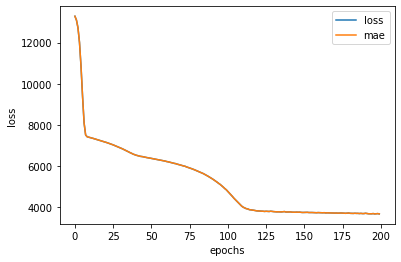

In [ ]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should we train the model for?
It depends on the question you are working on. To deal with this question, TensorFlow has a solution in the name of Early Stopping Callback. In a nuthsell, it means that stop training the model if a given metric of the model does not improve for some continuous number of epochs i.e. that the model has stopped learning

## Preprocessing data (normalization and standarization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which one to use, you could try both and see which one performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we import a few classes from Scikit-Learn 

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0] # This is the original data, the one we started with 

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[78] # This is the data we have right now, after normalization

array([0.43478261, 0.33118106, 0.2       , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data is normalized and one hot encoded. Now, let's build a neural network model

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss= tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.SGD(),
                         metrics = ["mae"])

# 3. Fit the model 
insurance_model_4.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13340.8467 - mae: 13340.8467
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11583.2441 - mae: 11583.2441
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6287.0601 - mae: 6287.0601
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 5571.6865 - mae: 5571.6865
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 5250.2153 - mae: 5250.2153
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 5036.7227 - mae: 5036.7227
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 5106.2729 - mae: 5106.2729
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 5412.0571 - mae: 5412.0571
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 5048.9932 - mae: 5048.9932
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5307.3394 - mae: 5307.

In [ ]:
# Evaluate our `insurance_model_4` trained on normalised data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3574.3762 - mae: 3574.3762


[3574.376220703125, 3574.376220703125]

In [ ]:
# Insurance model 2 results 
# 9/9 [==============================] - 0s 3ms/step - loss: 4880.5015 - mae: 4880.5015
# [4880.50146484375, 4880.50146484375]

## Exercise:
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
4. What happens if you train for longer (say 300 epochs instead of 200)?
5. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

### Question 1 and Question 2:


In [ ]:
from sklearn.model_selection import train_test_split

# Put the random seed
tf.random.set_seed(42)

# Making the data
X = np.random.randint(0, 1000, size = 500)
y = (50*X)+ 10

# Making the training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Making the model
ex_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
ex_model_1.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# Fit the model
ex_model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 23651.9453 - mae: 23651.9453
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 23240.5645 - mae: 23240.5645
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 22770.0527 - mae: 22770.0527
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 22195.6699 - mae: 22195.6699
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 21480.1191 - mae: 21480.1191
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 20541.9531 - mae: 20541.9531
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 19345.3418 - mae: 19345.3418
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 17832.5430 - mae: 17832.5430
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 15893.5088 - mae: 15893.5088
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 13565.92

In [ ]:
ex_model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 40.2396 - mae: 40.2396


[40.23963928222656, 40.23963928222656]

### Question 3

In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Importing the dependencies and dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
one_hot_insurance = pd.get_dummies(insurance)
one_hot_insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = one_hot_insurance.drop("charges", axis = 1)
y = one_hot_insurance["charges"]

In [ ]:
tf.random.set_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [ ]:
tf.random.set_seed(42)
ex_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ex_model_2.compile(loss= tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

In [ ]:
ex_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 13177.9238 - mae: 13177.9238
Epoch 2/200
34/34 [==============================] - 0s 9ms/step - loss: 12290.2559 - mae: 12290.2559
Epoch 3/200
34/34 [==============================] - 0s 9ms/step - loss: 12044.1338 - mae: 12044.1338
Epoch 4/200
34/34 [==============================] - 0s 9ms/step - loss: 11819.1436 - mae: 11819.1436
Epoch 5/200
34/34 [==============================] - 0s 9ms/step - loss: 11161.1387 - mae: 11161.1387
Epoch 6/200
34/34 [==============================] - 0s 9ms/step - loss: 9567.2100 - mae: 9567.2100
Epoch 7/200
34/34 [==============================] - 0s 9ms/step - loss: 8473.5127 - mae: 8473.5127
Epoch 8/200
34/34 [==============================] - 0s 9ms/step - loss: 8417.7559 - mae: 8417.7559
Epoch 9/200
34/34 [==============================] - 0s 9ms/step - loss: 8399.5107 - mae: 8399.5107
Epoch 10/200
34/34 [==============================] - 0s 9ms/step - loss: 8411.2705 - mae

In [ ]:
ex_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 1s 8ms/step - loss: 8218.4541 - mae: 8218.4541


[8218.4541015625, 8218.4541015625]

In [ ]:
tf.random.set_seed(42)
ex_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1),
])

ex_model_3.compile(loss= tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

ex_model_3.fit(X_test, y_test, epochs = 200)

Epoch 1/200
9/9 [==============================] - 2s 4ms/step - loss: 12930.5234 - mae: 12930.5234
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 12869.9287 - mae: 12869.9287
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 12797.5264 - mae: 12797.5264
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 12703.9229 - mae: 12703.9229
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 12580.2910 - mae: 12580.2910
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 12416.3818 - mae: 12416.3818
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 12202.1934 - mae: 12202.1934
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 11927.6260 - mae: 11927.6260
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 11581.3721 - mae: 11581.3721
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 11157.3027 - mae: 11157.3027

In [ ]:
ex_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 5698.1250 - mae: 5698.1250


[5698.125, 5698.125]

In [ ]:
tf.random.set_seed(42)
ex_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

ex_model_4.compile(loss= tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(lr=0.01),
                   metrics = ["mae"])

ex_model_4.fit(X_test, y_test, epochs = 200)

Epoch 1/200
9/9 [==============================] - 1s 5ms/step - loss: 12942.7783 - mae: 12942.7783
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 12907.0264 - mae: 12907.0264
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 12869.3662 - mae: 12869.3662
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 12827.4814 - mae: 12827.4814
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 12779.2090 - mae: 12779.2090
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 12721.7637 - mae: 12721.7637
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 12652.3838 - mae: 12652.3838
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 12568.4287 - mae: 12568.4287
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 12466.7383 - mae: 12466.7383
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 12344.6846 - mae: 12344.6846

In [ ]:
ex_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6180.6187 - mae: 6180.6187


[6180.61865234375, 6180.61865234375]

### Question 4 

In [ ]:
tf.random.set_seed(42)
ex_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

ex_model_5.compile(loss= tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

ex_model_5.fit(X_test, y_test, epochs = 300)

Epoch 1/300
9/9 [==============================] - 1s 7ms/step - loss: 12938.6963 - mae: 12938.6963
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 12901.9492 - mae: 12901.9492
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 12861.9141 - mae: 12861.9141
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 12815.6338 - mae: 12815.6338
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 12760.7607 - mae: 12760.7607
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 12694.5850 - mae: 12694.5850
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 12614.6162 - mae: 12614.6162
Epoch 8/300
9/9 [==============================] - 0s 4ms/step - loss: 12518.3828 - mae: 12518.3828
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 12402.8193 - mae: 12402.8193
Epoch 10/300
9/9 [==============================] - 0s 4ms/step - loss: 12265.4902 - mae: 12265.4902

In [ ]:
ex_model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 9ms/step - loss: 5820.6641 - mae: 5820.6641


[5820.6640625, 5820.6640625]

### Question 5

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [ ]:
len(X_train), len(y_train),len( X_test),len( y_test)

(1070, 1070, 268, 268)

In [ ]:
tf.random.set_seed(42)

ex_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ex_model_6.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                   metrics = ["mae"])

ex_model_6.fit(X_train, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 2s 4ms/step - loss: 13310.4082 - mae: 13310.4082
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 13170.0791 - mae: 13170.0791
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 12866.8076 - mae: 12866.8076
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 12247.8516 - mae: 12247.8516
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 11166.3467 - mae: 11166.3467
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 9731.4297 - mae: 9731.4297
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 8364.5283 - mae: 8364.5283
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 7613.2300 - mae: 7613.2300
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 7459.6138 - mae: 7459.6138
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 7437.1177 - mae:

In [ ]:
ex_model_6.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3368.9800 - mae: 3368.9800


[3368.97998046875, 3368.97998046875]